## Curve fitting using Least squares
For the 2D points, find the 2nd-order curve using least squares \
y = ax^2 + bx + c
## Sampling 6 2D points out of total 8 points
Randomly select 6 point \
Twice curve fitting \
Compare two curves

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [25]:
# y = ax^2 + bx + c
def func(x, a, b, c):
    return a*x**2 + b*x + c

In [26]:
%matplotlib inline
np.random.seed(12345)

Xc = [-2.9, -2.1, -0.9, 1.1, 0.1, 1.9, 3.1, 4.0]
Yc = [35.4, 19.7, 5.7, 2.1, 1.2, 8.7, 25.7, 41.5]

Xsquare = np.square(Xc)

In [27]:
tmp = []
for i in range(8):
    tmp.append([Xsquare[i], Xc[i], 1])
tmp

[[8.41, -2.9, 1],
 [4.41, -2.1, 1],
 [0.81, -0.9, 1],
 [1.2100000000000002, 1.1, 1],
 [0.010000000000000002, 0.1, 1],
 [3.61, 1.9, 1],
 [9.610000000000001, 3.1, 1],
 [16.0, 4.0, 1]]

In [28]:
X = np.mat(tmp)
Y = np.mat(Yc).T
X, Y

(matrix([[ 8.41e+00, -2.90e+00,  1.00e+00],
         [ 4.41e+00, -2.10e+00,  1.00e+00],
         [ 8.10e-01, -9.00e-01,  1.00e+00],
         [ 1.21e+00,  1.10e+00,  1.00e+00],
         [ 1.00e-02,  1.00e-01,  1.00e+00],
         [ 3.61e+00,  1.90e+00,  1.00e+00],
         [ 9.61e+00,  3.10e+00,  1.00e+00],
         [ 1.60e+01,  4.00e+00,  1.00e+00]]),
 matrix([[35.4],
         [19.7],
         [ 5.7],
         [ 2.1],
         [ 1.2],
         [ 8.7],
         [25.7],
         [41.5]]))

In [29]:
XTX = np.linalg.inv(np.matmul(X.T,X))
b = np.matmul(XTX, np.matmul(X.T,Y))
b

matrix([[ 3.16052477],
        [-2.36059821],
        [ 1.35828072]])

In [30]:
X_sample = np.random.choice(Xc, 6, replace = False)
sample_index = [Xc.index(z) for z in X_sample]
Y_sample = [Yc[i] for i in sample_index]

X_sample, Y_sample

(array([ 4. ,  1.1,  0.1, -2.9, -2.1,  3.1]),
 [41.5, 2.1, 1.2, 35.4, 19.7, 25.7])

In [31]:
X_sample_square = np.square(X_sample)

tmp = []
for i in range(6):
    tmp.append([X_sample_square[i], X_sample[i], 1])
tmp

[[16.0, 4.0, 1],
 [1.2100000000000002, 1.1, 1],
 [0.010000000000000002, 0.1, 1],
 [8.41, -2.9, 1],
 [4.41, -2.1, 1],
 [9.610000000000001, 3.1, 1]]

In [32]:
X = np.mat(tmp)
Y = np.mat(Y_sample).T
X, Y

(matrix([[ 1.60e+01,  4.00e+00,  1.00e+00],
         [ 1.21e+00,  1.10e+00,  1.00e+00],
         [ 1.00e-02,  1.00e-01,  1.00e+00],
         [ 8.41e+00, -2.90e+00,  1.00e+00],
         [ 4.41e+00, -2.10e+00,  1.00e+00],
         [ 9.61e+00,  3.10e+00,  1.00e+00]]),
 matrix([[41.5],
         [ 2.1],
         [ 1.2],
         [35.4],
         [19.7],
         [25.7]]))

In [33]:
XTX = np.linalg.inv(np.matmul(X.T,X))
b2 = np.matmul(XTX, np.matmul(X.T,Y))
b2

matrix([[ 3.16327676],
        [-2.39151458],
        [ 1.3446791 ]])

In [34]:
b = b.tolist()
b2 = b2.tolist()

b,b2

([[3.1605247687724383], [-2.3605982079786845], [1.3582807168133755]],
 [[3.1632767597643063], [-2.391514584760966], [1.3446791008427397]])

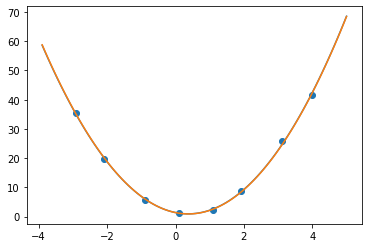

In [35]:
x1 = np.linspace(min(Xc)-1, max(Xc) + 1, 100)     # [0 1 2 3 4]
y1 =  b[0]*x1**2 + b[1]*x1 + b[2]
y2 =  b2[0]*x1**2 + b2[1]*x1 + b2[2]

plt.plot(x1, y1)
plt.plot(x1, y2)
plt.scatter(Xc, Yc)

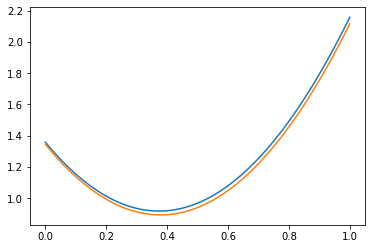

In [36]:
x1 = np.linspace(0, 1, 100)     # [0 1 2 3 4]
y1 =  b[0]*x1**2 + b[1]*x1 + b[2]
y2 =  b2[0]*x1**2 + b2[1]*x1 + b2[2]

plt.plot(x1, y1)
plt.plot(x1, y2)